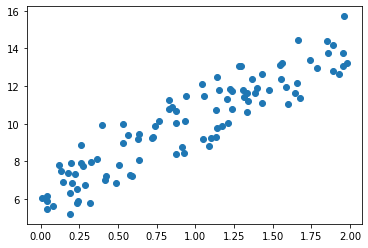

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6을 근사(x1=4, x0=6). 임의의 값은 노이즈를 위해 만듦.
X = 2 * np.random.rand(100, 1) # 0~1사이의 균일 분포에서 난수 matrix array 생성
y = 6 + 4 * X + np.random.randn(100,1) # 가우시안 표준 정규 분포에서 난수 matrix array 생성

# X, y 데이터 세트 산점도로 시각화
plt.scatter(X, y)

In [5]:
# 비용 함수: 실제 y값과 예측된 y값을 인자로 받아서 계산
def get_cost(y, y_pred):
    N=len(y)
    cost = np.sum(np.square(y - y_pred))/N
    return cost

- 경사 하강법을 gradient_descent()함수를 생성해 구현해보자
- w1, w0을 모두 0으로 초기화 한 뒤 iters 개수만큼 반복하면서 w1, w0을 업데이트
- get_weight_update() 함수에서, 입력 배열 X값에 대한 예측 배열 y_pred는 np.dot(X, w1.T) + w0으로 구함
    - 100개의 데이터 X(1,2,...,100)이 있다면 예측값은 *w0 + X(1)*w1 + X(2)*w1 + ... + X(100)*w1 이며, 이는 입력 배열 X와 w1 배열의 내적과 동일
    

In [10]:
# w1과 w0를 업데이트 할 w1_update, w0_update를 반환
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred
    
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N,1))
    
    # w1과 w0를 업데이트할 w1_update와 w0_update 계산
    w1_update= -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))
    
    return w1_update, w0_update

In [11]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용
def gradient_descent(X, y, iters=10000):
    # w0과 w1을 모두 0으로 초기화
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # 인자로 주어진 iters만큼 반복적으로 get_weight_updates() 호출해 w1과 w0 업데이트 수행
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
    return w1, w0

In [13]:
w1, w0 = gradient_descent(X, y, iters=10000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost: {0:.4f}'.format(get_cost(y, y_pred)))

# 실제 선형식인 Y = 4X + 6과 유사하게 w1=3.968, w0=6.222가 도출됨
# 예측 오류 비용은 약 0.9924

w1:3.968 w0:6.222
Gradient Descent Total Cost: 0.9924


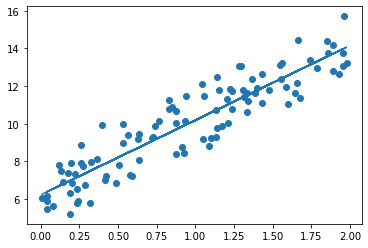

In [14]:
# 앞에서 구한 y_pred에 기반해 회귀선을 그려 보자
plt.scatter(X, y)
plt.plot(X, y_pred)

- 경사 하강법을 이용해 회귀선이 잘 만들어졌음을 알 수 있음
- 일반적으로 경사 하강법은 모든 학습 데이터에 대해 반복적으로 비용함수 최소화를 위한 값을 업데이트하기때문에 수행 시간이 매우 오래 걸린다는 단점이 있음
    - 그 때문에 실전에서는 대부분 확률적 경사 하강법(Stochastic Gradient Descent)를 이용
    - 확률적 경사 하강법은 전체 입력 데이터로 w가 업데이트되는 값을 계산하는 것이 아니라 일부 데이터만 이용해 w가 업데이트되는 값을 계산하므로 빠른 속도 보장
    - 따라서 대용량의 데이터의 경우 대부분 확률적 경사 하강법이나 미니 배치 확률적 경사 하강법을 이용해 최적 비용함수 도출 

In [15]:
# (미니 배치) 확률적 경사 하강법은 stochastic_gradient_descent()함수로 구현해보자
# X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 이를 기반으로 w1_update, w0_update를 계산

def stochastic_gradient_descent(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index = 0
    
    for ind in range(iters):
        np.random.seed(ind)
        
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
    return w1, w0

In [16]:
w1, w0 = stochastic_gradient_descent(X, y, iters=1000)
print("w1:", round(w1[0,0], 3), "w0:", round(w0[0,0], 3))
y_pred = w1[0,0] * X + w0
print("Stochastic Gradient Descent Total Cost: {0:.4f}".format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost: 0.9937
